# Implement K-Means Clustering Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings('ignore')
#This line of code is used to suppress any warning messages that might be generated during the execution of the subsequent code.

In [7]:
#df=pd.read_csv("cars.csv")  this method or down method
df=pd.read_csv('/content/cars.csv',usecols=['odometer_value','year_produced','price_usd'])

In [8]:
df.shape

(5371, 3)

In [ ]:
df.head()

,odometer_value,year_produced,price_usd
0,190000,2010,10900.00
1,290000,2002,5000.00
2,402000,2001,2800.00
3,10000,1999,9999.00
4,280000,2001,2134.11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   odometer_value  38531 non-null  int64  
 1   year_produced   38531 non-null  int64  
 2   price_usd       38531 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 903.2 KB


In [ ]:
df.describe()

,odometer_value,year_produced,price_usd
count,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,6639.971021
std,136072.376530,8.065731,6428.152018
min,0.000000,1942.000000,1.000000
25%,158000.000000,1998.000000,2100.000000
50%,250000.000000,2003.000000,4800.000000
75%,325000.000000,2009.000000,8990.000000
max,1000000.000000,2019.000000,50000.000000


In [ ]:
df.isnull().sum()

,0
odometer_value,0
year_produced,0
price_usd,0


<Axes: xlabel='year_produced', ylabel='odometer_value'>

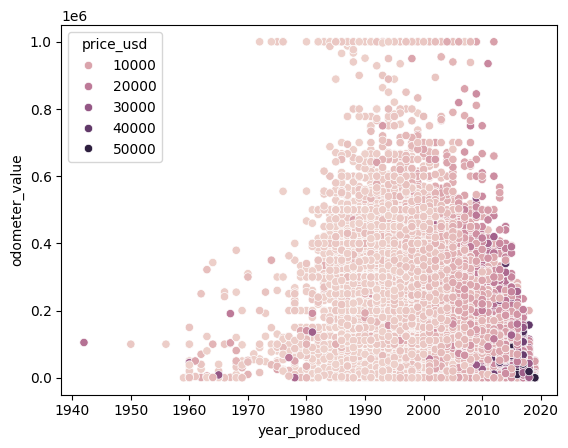

In [ ]:
#visualize the data
sns.scatterplot(data=df,x='year_produced',y='odometer_value',hue='price_usd') # to detect outliers

**Data normalization :- Structure attributes on the same scale . Either mean 0 and SD 1 or between 0 and 1.**

In [ ]:
from sklearn.preprocessing import StandardScaler

#normalize the data
scaler=StandardScaler()
scaler.fit(df[['odometer_value','year_produced','price_usd']]) # intro to data for scalar
df_normalized=scaler.transform(df[['odometer_value','year_produced','price_usd']]) # makes it in one scale
print(df_normalized[:5])

[[-0.43260362  0.87485665  0.66272301]
 [ 0.30230894 -0.11700687 -0.25512656]
 [ 1.125411   -0.24098981 -0.59737555]
 [-1.75544621 -0.48895569  0.52255649]
 [ 0.22881768 -0.24098981 -0.70096654]]


**Search for the best number of clusters with the Elbow method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#calculate the within-clustera sum of square across different clusters counts
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42,n_init='auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_) # plot the elbow graph

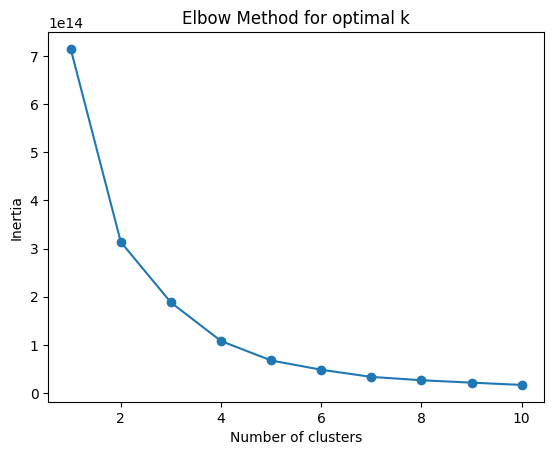

In [ ]:
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

**Clustering with K-Means**

In [ ]:
#Elbow is at three clusters
kmeans=KMeans(n_clusters=3,random_state=42,n_init='auto')
clusters=kmeans.fit_predict(df_normalized)

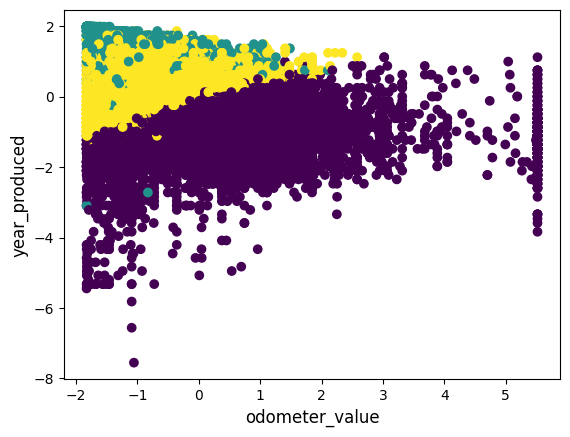

In [ ]:
#choose two dimensions to plot ( odometer_value and year_produced)
plt.scatter(df_normalized[:,0],df_normalized[:,1],c=clusters,cmap='viridis',marker='o')# 0- refers to odometer and 1- year
plt.xlabel('odometer_value',fontsize=12)
plt.ylabel('year_produced',fontsize=12)
plt.show()

**CLUSTER ANALYSIS- are the clusters correctly made**


     count          mean          std      min       25%      50%       75%  \
0  19276.0   2723.463427  1985.037525     1.00   1249.75   2300.0   3782.31   
1   4568.0  19905.578398  7566.002147  9437.54  14746.28  17500.0  22753.48   
2  14687.0   7654.290208  3088.330504     1.00   5500.00   7500.0   9700.00   

       max  
0  30000.0  
1  50000.0  
2  18500.0  


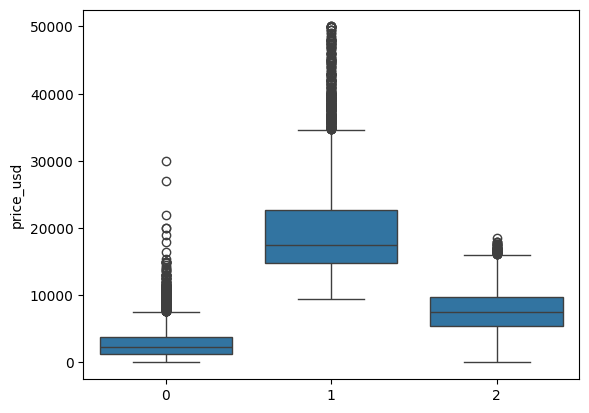

In [ ]:
sns.boxplot(x=clusters,y=df['price_usd'])
summary_stats=df.groupby(clusters)['price_usd'].describe()
print(summary_stats)

     count           mean            std  min       25%       50%       75%  \
0  19276.0  328206.400757  129585.298677  1.0  264000.0  318213.5  380000.0   
1   4568.0  106749.637916   74482.783619  0.0   48150.0  103000.0  156000.0   
2  14687.0  188933.373528   81707.573400  0.0  136000.0  190000.0  244620.0   

         max  
0  1000000.0  
1   535000.0  
2   600000.0  


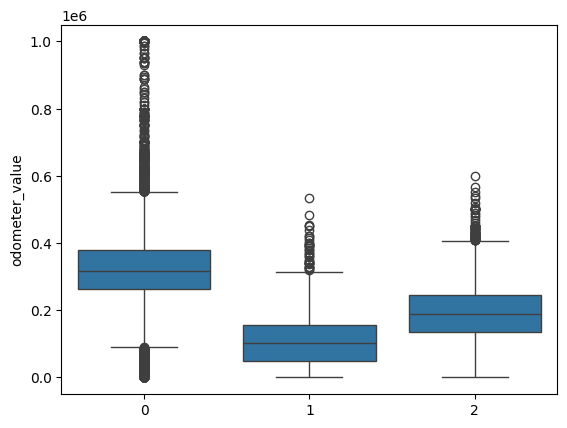

In [ ]:
sns.boxplot(x=clusters,y=df['odometer_value'])
summary_stats=df.groupby(clusters)['odometer_value'].describe()
print(summary_stats)

     count         mean       std     min     25%     50%     75%     max
0  19276.0  1996.665335  5.411023  1942.0  1994.0  1998.0  2000.0  2012.0
1   4568.0  2014.069834  3.211429  1978.0  2012.0  2014.0  2016.0  2019.0
2  14687.0  2007.723361  3.994489  1986.0  2005.0  2008.0  2010.0  2019.0


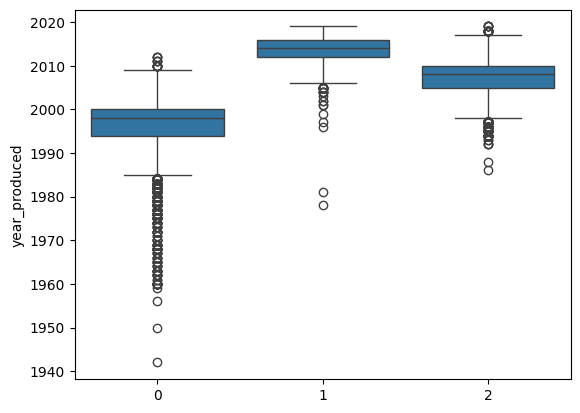

In [ ]:
#CLUSTER ANALYSIS
sns.boxplot(x=clusters,y=df['year_produced'])
summary_stats=df.groupby(clusters)['year_produced'].describe()
print(summary_stats)

**Cluster integration in the Dataset**


In [ ]:
#adding clusters column to the dataframe
df['cluster']=clusters

#now lets see the first five instances of the updated dataset
print(df.head(10))

   odometer_value  year_produced  price_usd  cluster
0          190000           2010   10900.00        2
1          290000           2002    5000.00        0
2          402000           2001    2800.00        0
3           10000           1999    9999.00        2
4          280000           2001    2134.11        0
5          132449           2011   14700.00        1
6          318280           1998    3000.00        0
7          350000           2004    4500.00        0
8          179000           2010   12900.00        2
9          571317           1999    4200.00        0


In [ ]:
#load the original dataset(copy)
df_ori=pd.read_csv("cars.csv")
df_ori.head() # without the clusters column

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [ ]:
#Map the cluster number to a meaning
clusters_names_map={
    0:'Normal',
    1:'Recent',
    2:'Classic'
}

#create a new column with the cluster name
df_ori['cluster']=pd.Series(clusters).map(clusters_names_map)

#printing the new datatframe
df_ori.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,cluster
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,Classic
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,Normal
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,Normal


<Axes: xlabel='year_produced', ylabel='odometer_value'>

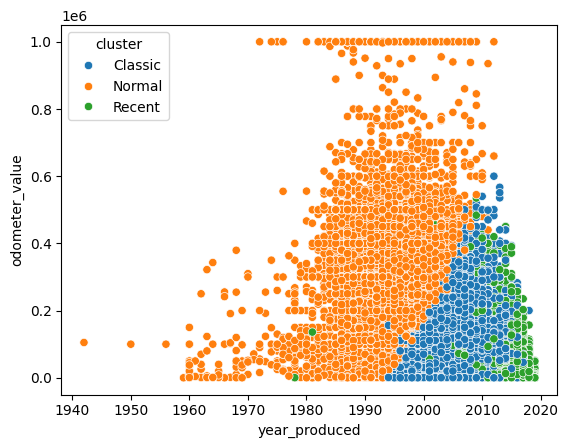

In [ ]:
#plot tye new dataset we made with clusters
sns.scatterplot(data=df_ori,x='year_produced',y='odometer_value',hue='cluster')

**Three dimentional visualization of cluters**

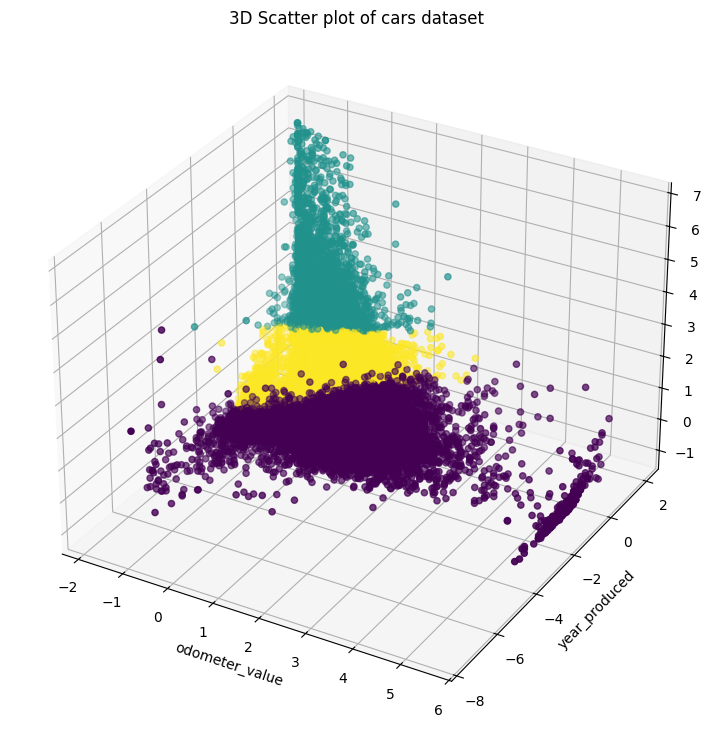

In [ ]:
fig=plt.figure(figsize=(12,9))
ax=fig.add_subplot(111,projection='3d')

#scatterplot using the first three features of the cars dataset
ax.scatter(df_normalized[:,0], #odometer_value
           df_normalized[:,1], # year_produced
           df_normalized[:,2], # price_usd
           c=clusters, #use cluster label as color encoding
           cmap='viridis',
           marker='o')

#set labels according  to the features we used

ax.set_xlabel('odometer_value')
ax.set_ylabel('year_produced')
ax.set_zlabel('price_usd')

#title of the plot
plt.title('3D Scatter plot of cars dataset')

plt.show()
